__author__ = "Tanapat Kamsaiin,  Rak suwannarak"

__copyright__ = "Copyright 2020 August, Price and Volume optimize Project."

__credits__ = "FINNOMENA"

__version__ = "1.0"

__maintainer__ = "Tong Tanapat"

__email__ = "tong.t@finnomena.com"

__status__ = "Beta"

## ทำการติดตั้ง Library ทั้งหมดก่อนใช้งาน
!pip install pandas_datareader

!pip install pyfolio

In [31]:
# ทำการเรียกข้อมูลจาก Yahoo Finance ด้วย Library Pandas_datareader
from pandas_datareader import data

# ใช้ในการแสดงผลเป็นภาพด้วย library matplotlib
import matplotlib.pyplot as plt

# วิเคราะห์ผลตอบแทนจากระบบด้วยภาพ
import pyfolio

# Library ที่ใช้ในการจัดการข้อมูล
import pandas as pd
import numpy as np

In [32]:
# กำหนดรายชื่อหุ้นที่ต้องการนำมาทดสอบ
stock_list = ['AAPL', 'AMZN', 'NFLX', 'NVDA','MSFT']

# กำหนดวันเริ่มจนถึงวันที่สิ้นสุดที่ต้องการ
start_date = '2010-1-1'
end_date = '2020-08-20'

In [33]:
# สร้างกล่องเก็บข้อมูลหุ้นในรูปแบบ Dictionary
stock_data_dictionary = {}

for stock_name in stock_list:
    
    # เรียกข้อมูลหุ้นจาก Yahoo    
    df = data.get_data_yahoo(stock_name, start_date, end_date)
    
    # สร้างคอลัมผลตอบแทนในรูปแบบการเปลี่ยนแปลงรายวัน เพื่อนำไปคำนวณผลตอบแทน
    df['daily_pct_change'] = df['Adj Close'].pct_change()

    # ลบข้อมูลที่เป็น NaN ทิ้ง
    df = df.dropna()

    # เพิ่มข้อมูลลงในกล่องเก็บข้อมูล Dictionary ที่สร้างไว้
    stock_data_dictionary.update({stock_name: df})

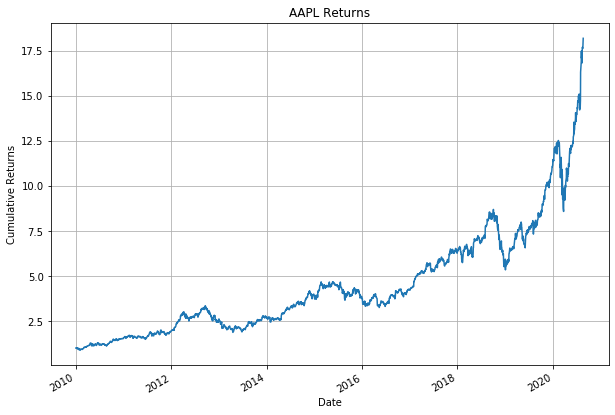

In [34]:
# กำหนดขนาดของภาพที่ต้องการแสดงผล โดยปกติผมจะใช้ขนาด 10, 7
plt.figure(figsize=(10, 7))

# เข้าถึงข้อมูลหุ้น AAPL ที่อยู่ใน Dictionary และคำนวณผลตอบแทนแสดงเป็นภาพ
(stock_data_dictionary['AAPL'].daily_pct_change+1).cumprod().plot()

# ตั้งชื่อภาพ และชื่อกำหนดแกน y และแสดงผลเป็นเส้นตาราง
plt.title('AAPL Returns')
plt.ylabel('Cumulative Returns')
plt.grid()
plt.show()

AAPL


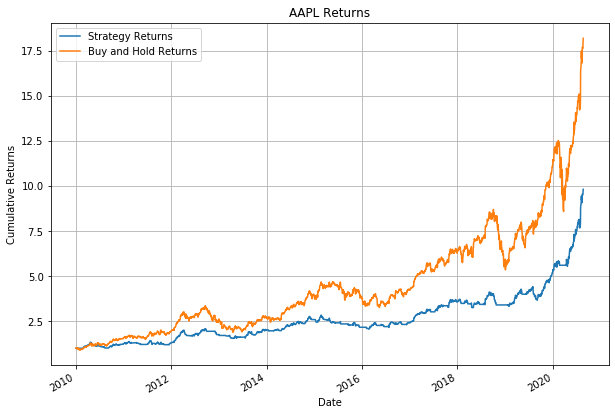

AMZN


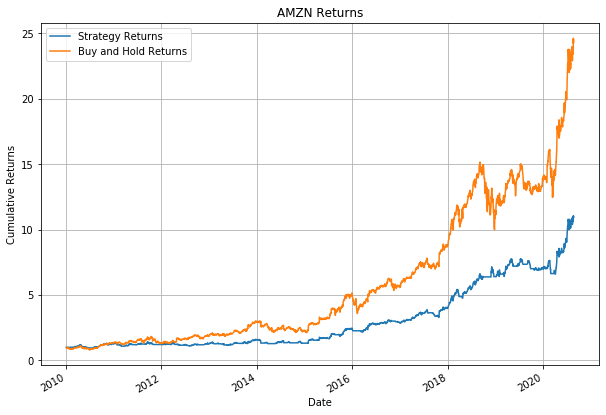

NFLX


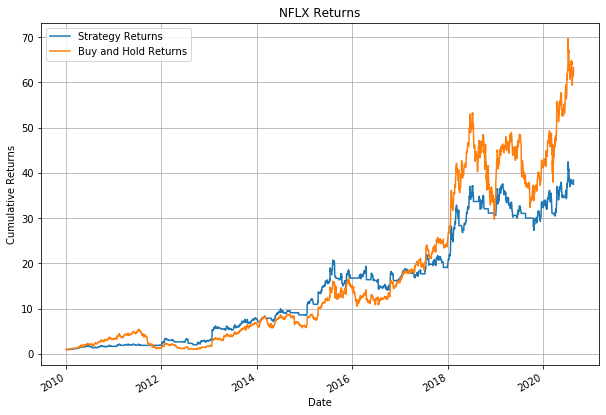

NVDA


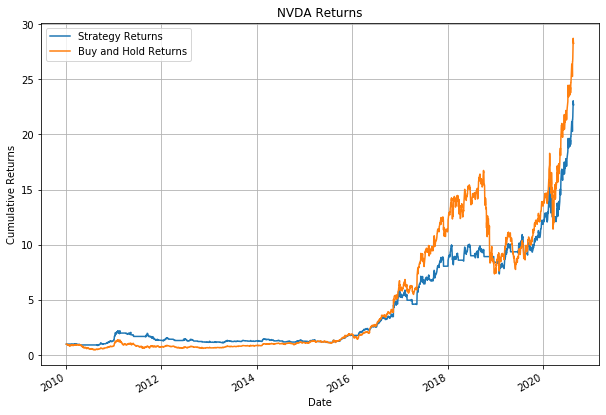

MSFT


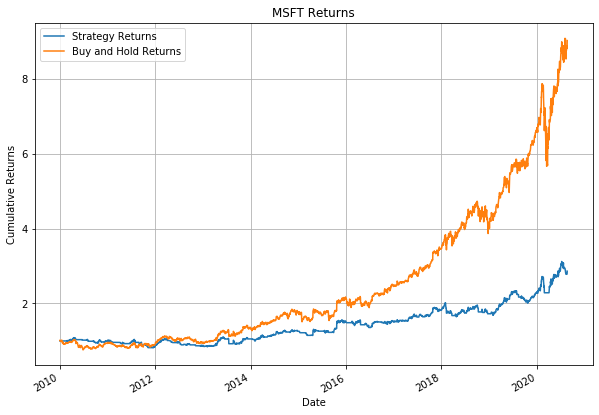

In [35]:
# สร้าง DataFrame ขึ้นมาเพื่อรองรับผลตอบแทนของหุ้นรายตัว
portfolio = pd.DataFrame(columns=stock_list)

# แสดงผลตอบแทนจากกลยุทธ์เทียบกับการ Buy and Hold ของหุ้นแต่ละตัว
for stock_name in stock_list:
    
    # รับข้อมูลหุ้นเข้ามารวมกันไว้ในตัวแปรชื่อ df
    df = stock_data_dictionary[stock_name]

    # สร้างกลยุทธ์ที่คำนวณด้วยการนำราคาปิดของวันล่าสุดเทียบกับ 20 วันก่อนหน้า 
    # หากมากกว่า ก็ทำการเข้าซื้อ และขายเมื่อต่ำกว่า 20 วันก่อนหน้า
    df['signal'] = df['Close'].shift(1) > df['Close'].shift(20)
    
    # คำนวณผลตอบแทนของกลยุทธ์ด้วยการนำสัญญาณคิดรวมกับผลตอบแทนรายวัน
    df['strategy_returns'] = df.daily_pct_change * df.signal

    # สร้างตัวแปร portfolio เพื่อรับค่าผลตอบแทนจากกลยุทธ์ของหุ้นแต่ละตัว
    portfolio[stock_name] = df.strategy_returns
    
    # แสดงชื่อหุ้นแต่ละตัวคู่กันตามภาพผลตอบแทน
    print(stock_name)
    
    # กำหนดขนาดของภาพที่ต้องการ
    plt.figure(figsize=(10, 7))
    
    # คำนวณผลตอบแทนแบบ Cumulative Returns จากกลยุทธ์และแสดงผล
    (df.strategy_returns+1).cumprod().plot()
    
    # คำนวณผลตอบแทนแบบ Cumulative returns จากการ Buy and Hold
    (stock_data_dictionary[stock_name].daily_pct_change+1).cumprod().plot()    
    
    # ตั้งชื่อภาพ ทำการกำหนดชื่อแกน y และแสดงชื่อของกลยุทธ์
    plt.title(stock_name + ' Returns')
    plt.ylabel('Cumulative Returns')
    plt.legend(labels=['Strategy Returns', 'Buy and Hold Returns'])
    plt.grid()
    plt.show()

Start date,2010-01-04
End date,2020-08-20
Total months,127
,Backtest
Annual return,29.434%
Cumulative returns,1449.809%
Annual volatility,15.84%
Sharpe ratio,1.71
Calmar ratio,1.96
Stability,0.98
Max drawdown,-14.995%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,15.00,2012-03-27,2012-07-26,2013-01-24,218
1,14.91,2011-02-17,2011-12-08,2012-01-26,246
2,14.60,2010-04-26,2010-08-31,2010-09-24,110
3,13.92,2020-02-19,2020-04-03,2020-05-06,56
4,11.98,2018-09-04,2019-01-29,2019-03-20,142


Stress Events,mean,min,max
US downgrade/European Debt Crisis,-0.13%,-1.46%,0.55%
Fukushima,0.03%,-0.71%,0.83%
EZB IR Event,0.05%,-2.80%,2.59%
Flash Crash,-0.57%,-2.06%,1.41%
Apr14,-0.11%,-1.43%,0.69%
Oct14,0.06%,-0.51%,1.10%
Fall2015,-0.19%,-3.34%,1.51%
Recovery,0.07%,-5.48%,4.68%
New Normal,0.12%,-4.10%,8.86%


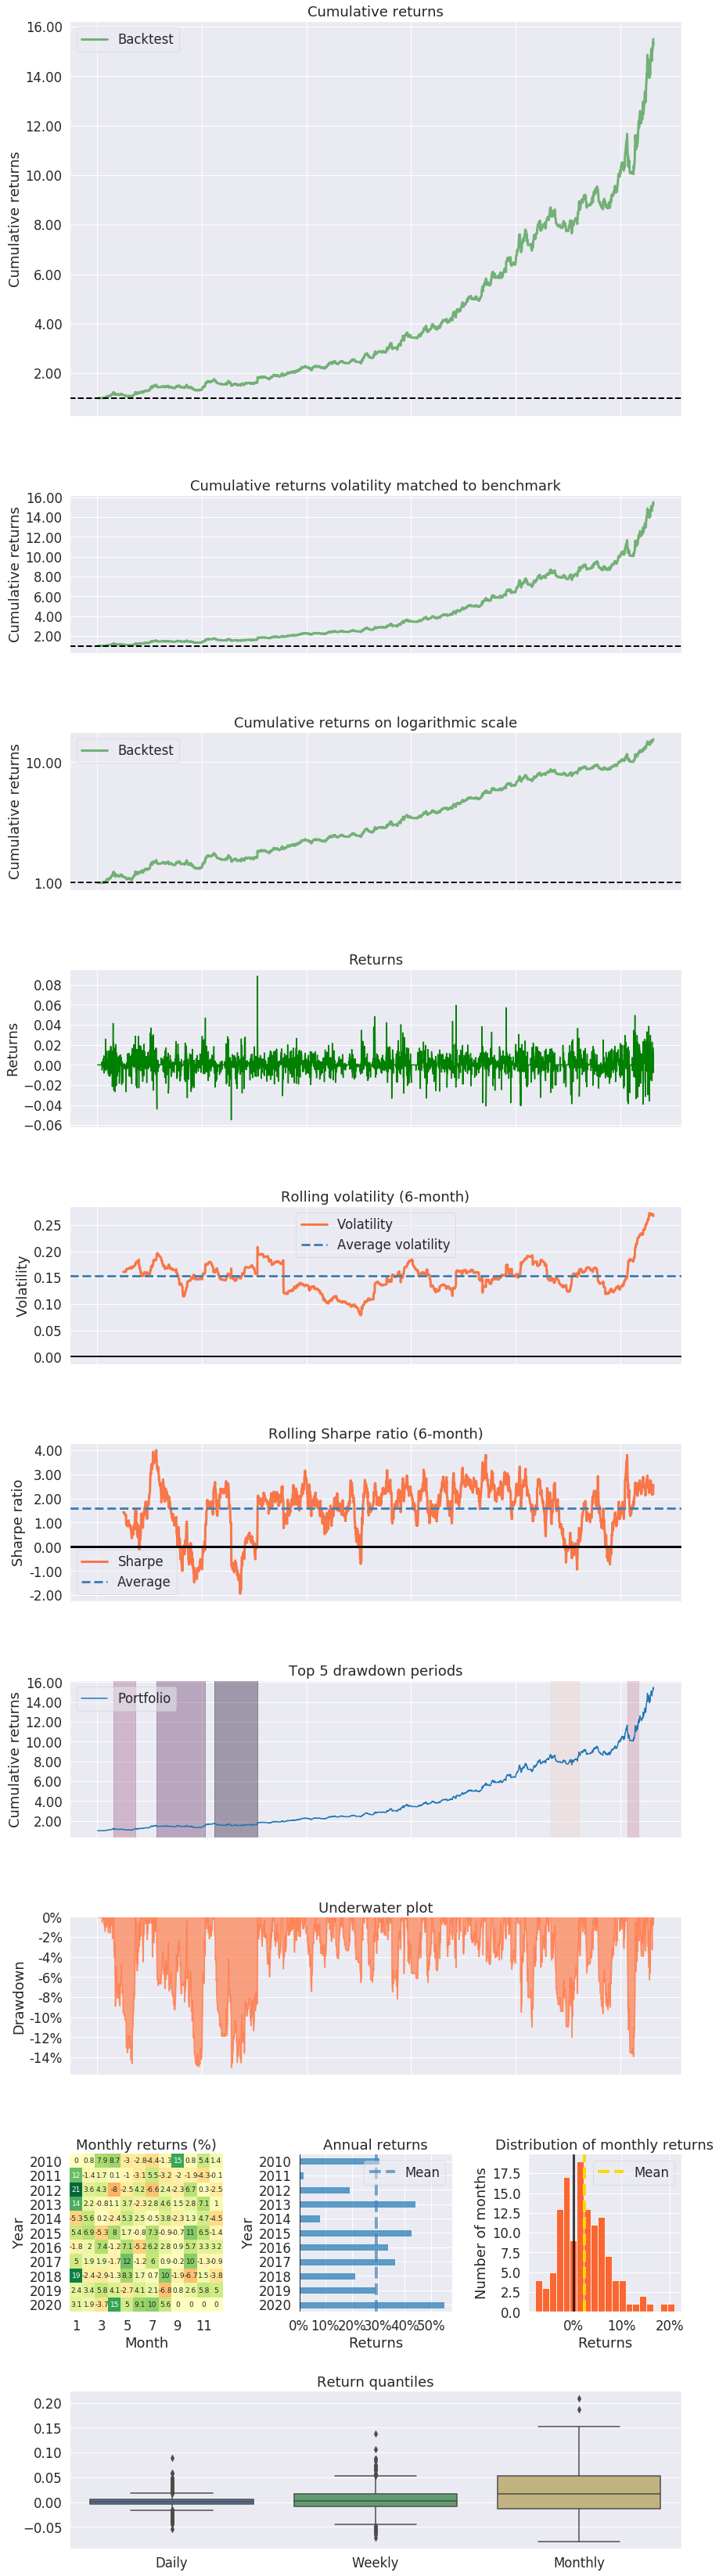

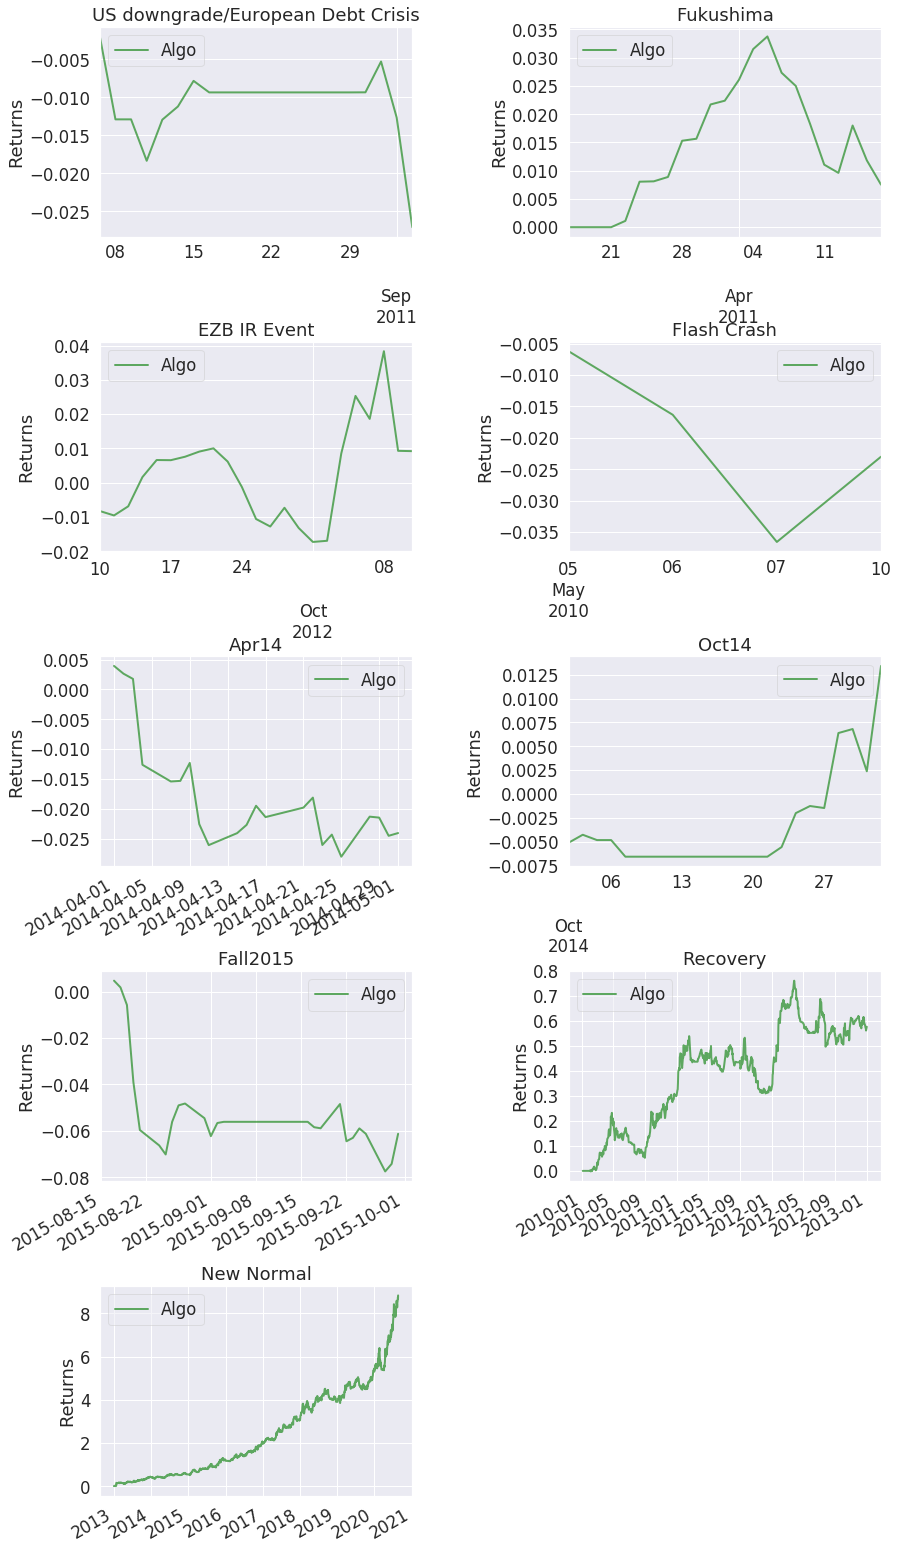

In [36]:
# ชุดคำสั่งการแสดงผลด้วยการเรียก pyfolio และใช้คำสั่ง create ให้แสดงผลจาก portfolio ของเราด้วยวิธี Equal weight
pyfolio.create_full_tear_sheet(portfolio.mean(axis=1))

# End

### www.popquants.com